# OULAD DATASET
Analyzed by: Grace Nam (graceen95@gmail.com)

In [1]:
# import packages 

# computing/analysis
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [2]:
# import the datasets
courses = pd.read_csv('anonymisedData/courses.csv')
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')
assessments = pd.read_csv('anonymisedData/assessments.csv')
studentAssessment = pd.read_csv('anonymisedData/studentAssessment.csv')
studentRegistration = pd.read_csv('anonymisedData/studentRegistration.csv')
studentVLE = pd.read_csv('anonymisedData/studentVle.csv')
vle = pd.read_csv('anonymisedData/vle.csv')

## I. Descriptive Analysis


<font color=blue>We'll first explore the tables that we imported. We're mainly going to do a preliminary look and get an understanding of the dataset. We'll then proceed to the cohort analysis. 

### courses Table

In [3]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [4]:
# average number of days per module
courses.groupby(['code_module'])['module_presentation_length'].agg('mean')

code_module
AAA    268.500000
BBB    251.000000
CCC    255.000000
DDD    251.000000
EEE    259.333333
FFF    254.500000
GGG    257.000000
Name: module_presentation_length, dtype: float64

In [5]:
courses.describe()
# modules lasted between 234-269 days. 

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


 ### StudentInfo Table

In [6]:
# Get an understanding of what we have in the studentInfo table.
studentInfo.info()

# We see that we have some missing data in the `imd_band` column, which we would need to take into account when we analyze `imd_band` later. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [7]:
studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
len(studentInfo['id_student'])

32593

In [9]:
len(studentInfo['id_student'].unique())
# Note that this table can have multiple student as it is arranged to represent one registration at a time

28785

In [10]:
studentInfo.groupby(['id_student'])['code_module'].count().describe()
# students on average took 1.13 classes during 2013-2014, with max number of classes being 5 classes. 

count    28785.000000
mean         1.132291
std          0.367915
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: code_module, dtype: float64

In [11]:
studentInfo['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [12]:
# In our analysis we'll look at the outcome as a binary result - Pass or Fail. 
pass_fail = {'Withdrawn': 'Fail', 'Distinction': 'Pass'}
studentInfo['final_result'] = studentInfo['final_result'].replace(pass_fail)

In [13]:
studentInfo['final_result'].unique()

array(['Pass', 'Fail'], dtype=object)

Text(0, 0.5, 'Number of Students')

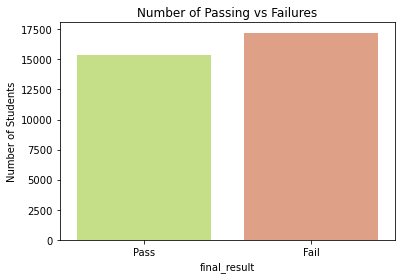

In [14]:
PF = sns.countplot(x=studentInfo['final_result'], palette={'Fail': '#EE9979', 'Pass': '#CBEE79'})
PF.set_title('Number of Passing vs Failures')
PF.set_ylabel('Number of Students')

In [15]:
location = studentInfo.groupby('region')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)

In [16]:
def piechart(df, group, count, title):
    '''
    df: the  grouped dataframe that is getting plotted
    group: the categories we want to show
    count: the column that has count of the values per category
    title: title that goes on the pie chart
    '''

    labels = df[group].values
    data = df[count].values

    fig = plt.figure(figsize=(10, 7))
    plt.pie(data, labels=labels)
    plt.title(title)
    plt.show()

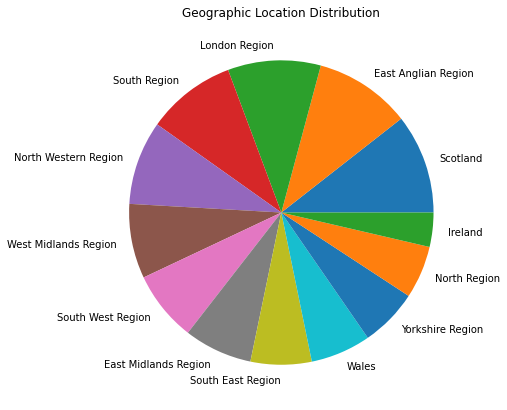

In [17]:
piechart(location, 'region', 'id_student', 'Geographic Location Distribution')

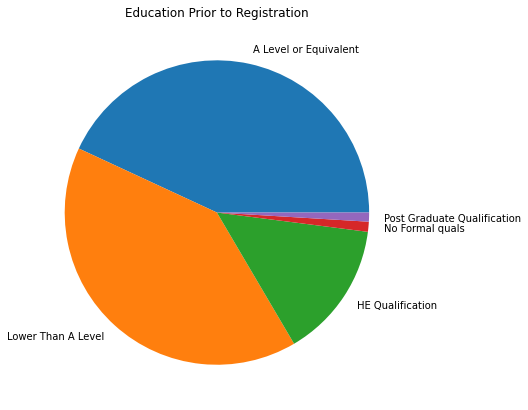

In [18]:
high_ed = studentInfo.groupby('highest_education')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)
piechart(high_ed, 'highest_education', 'id_student', 'Education Prior to Registration')

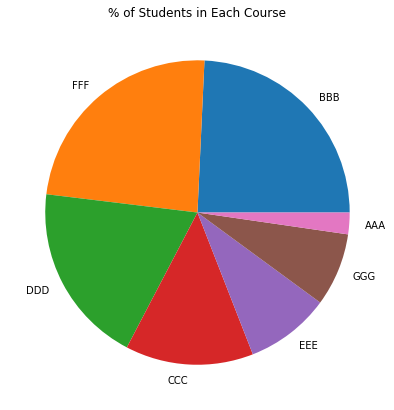

In [19]:
courses = studentInfo.groupby('code_module')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)
piechart(courses, 'code_module', 'id_student', '% of Students in Each Course')

In [20]:
# courses: https://www.nature.com/articles/sdata2017171/tables/2

course_dict = {'AAA': 'SS', 'BBB': 'SS', 'CCC': 'STEM', 'DDD': 'STEM', 'EEE': 'STEM', 'FFF': 'STEM', 'GGG': 'SS'}
courses['code_module'].replace(course_dict, inplace=True)


In [21]:
courses = courses.groupby('code_module')['id_student'].sum().reset_index().sort_values(by=['id_student'], ascending=False)

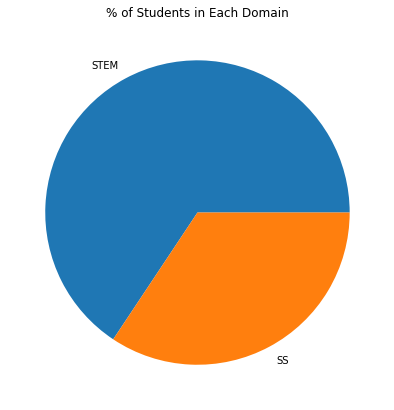

In [22]:
piechart(courses, 'code_module', 'id_student', '% of Students in Each Domain')

### Assessments Table

In [23]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [24]:
# notice we have null values for column `date`. This is where where they're located. Per data source = "If the information about the final exam date is missing, it is at the end of the last presentation week."
assessments.loc[assessments['date'].isnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


### studentAssessment Table

In [25]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [26]:
# we see some null values in the score column. According to the data source: "The final exam submissions is missing, if the result of the assessments is not stored in the system"

In [27]:
studentAssessment.groupby(['id_student'])['id_assessment'].count().describe()

count    23369.000000
mean         7.441996
std          4.223937
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         28.000000
Name: id_assessment, dtype: float64

### studentRegistration

In [28]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [29]:
# note we have a lot of missing data in the date_unregistration column. According to the data source, it simply means that the student did not withdraw. 
# we have some missing data in the date_registration column, and we're not sure about the reason. 

In [30]:
studentRegistration[['date_registration', 'date_unregistration']].describe()

,date_registration,date_unregistration
count,32548.000000,10072.000000
mean,-69.411300,49.757645
std,49.260522,82.460890
min,-322.000000,-365.000000
25%,-100.000000,-2.000000
50%,-57.000000,27.000000
75%,-29.000000,109.000000
max,167.000000,444.000000


In [31]:
round((studentRegistration['date_unregistration'].count() / studentRegistration['date_registration'].count()) * 100, 2)

30.95

In [32]:
# about 31% of the students unregistered at some point in their course. More analysis on withdrawals later

### studentVLE

In [33]:
studentVLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [34]:
len(studentVLE)

10655280

In [35]:
# due to computational limitations on my Mac, I cannot work with this entire dataset. I'll take a 10% random sample of the dataset.

# Take a random sample 10% of the dataset
studentVLE = studentVLE.sample(frac=0.1, random_state=1).reset_index(drop=True)

print(len(studentVLE))

studentVLE.head(10)

1065528


,code_module,code_presentation,id_student,id_site,date,sum_click
0,BBB,2014J,570275,913474,229,1
1,FFF,2013J,599199,716744,-9,4
2,FFF,2014J,1837138,882537,156,16
3,DDD,2013B,476637,547856,136,1
4,BBB,2013J,404269,703939,9,2
5,AAA,2014J,135471,877030,161,1
6,BBB,2013B,360188,542797,73,1
7,BBB,2013J,367433,703895,95,1
8,BBB,2014B,2164251,768348,207,11
9,EEE,2014B,633511,790923,150,1


### VLE

In [36]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [37]:
# we have missing data in week_from and week_to column which indicates that we don't have an approximate date range of when these modules were being planned to be used. We can fill the nulls later if we end up using these columns

vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


## II. Performance trends among various demographic cohorts (age, gender, imd_band, highest education etc.)

<font color=blue> 
I decided to explore disability, age, gender and imd_band.

### Disability

In [38]:
studentInfo['disability'].unique()
# disability is a binary outcome - N or Y

array(['N', 'Y'], dtype=object)

Text(0.5, 1.0, 'Count of Students Declaring Disability')

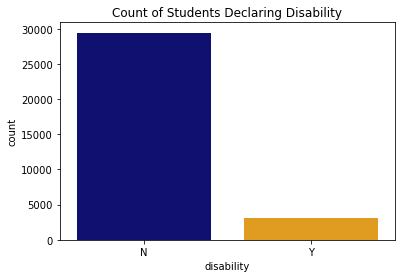

In [39]:
dYN = sns.countplot(x=studentInfo['disability'], palette={'Y': 'orange', 'N': 'navy'})
dYN.set_title('Count of Students Declaring Disability')

In [40]:
# count of students declaring disability - Y or N
studentInfo.groupby(['disability'])['id_student'].count()

disability
N    29429
Y     3164
Name: id_student, dtype: int64

In [41]:
# count of pass/fail in students declaring disability - Y or N 
d = studentInfo.groupby(['disability','final_result'])['id_student'].count()
print(d)


disability  final_result
N           Fail            15251
            Pass            14178
Y           Fail             1957
            Pass             1207
Name: id_student, dtype: int64


In [42]:
# we will make a function for stacked percent chart because we will reuse it later

def stacked_percent(grouped_data, description):
    
    '''
    grouped_data: provide a grouped dataframe with the count of each student per category
    description: provide the description of the graph to print with the title
    '''
    
    # find percentages 
    percentage_calculated = grouped_data.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    df = percentage_calculated.unstack('final_result')
    stacked_plt = df.plot(kind='bar', stacked=True, color={'Fail': '#EE9979', 'Pass': '#CBEE79'}, mark_right=True)
    stacked_plt.set_ylabel('Percentage (%)')
    stacked_plt.set_title('% of Passing in Students {}'.format(description))


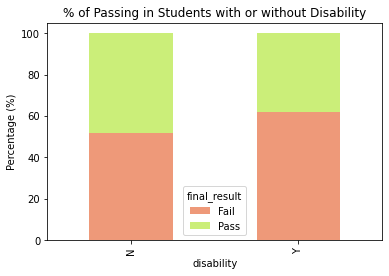

In [43]:
stacked_percent(d, 'with or without Disability')

## Age

In [44]:
# We first want to look at the age data and what unique values there are
print(studentInfo['age_band'].unique())

['55<=' '35-55' '0-35']


Text(0.5, 1.0, 'Distribution of Age Bands')

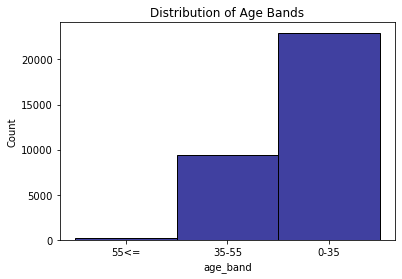

In [45]:
a = sns.histplot(x=studentInfo['age_band'], color='navy')
a.set_title('Distribution of Age Bands')

In [46]:
# We see that students 55 and up are severely underrepresented in the dataset. We have a larger number of students between 0-35 and 35-55, respectively. 

In [47]:
studentInfo.groupby(['age_band'])['id_student'].count()

age_band
0-35     22944
35-55     9433
55<=       216
Name: id_student, dtype: int64

In [48]:
# analyizing outcome
age_score = studentInfo.groupby(['age_band','final_result'])['id_student'].count()
age_score

age_band  final_result
0-35      Fail            12612
          Pass            10332
35-55     Fail             4513
          Pass             4920
55<=      Fail               83
          Pass              133
Name: id_student, dtype: int64

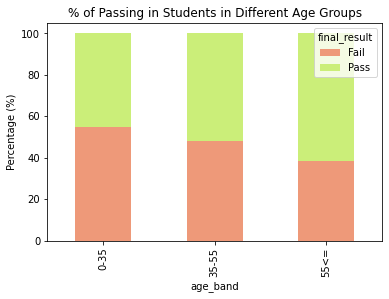

In [49]:
stacked_percent(age_score, 'in Different Age Groups')

## Gender

In [50]:
print(studentInfo['gender'].unique())

['M' 'F']


In [51]:
# group by gender and count student ids in each gender
print(studentInfo.groupby(['gender'])['id_student'].count().reset_index())

  gender  id_student
0      F       14718
1      M       17875


Text(0.5, 1.0, 'Number of Students (Male or Female)')

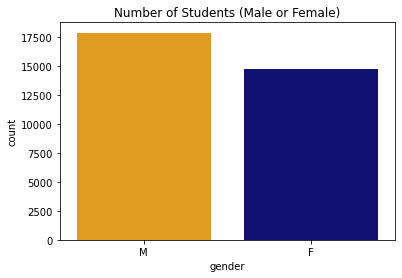

In [52]:
gender_distribution = sns.countplot(x=studentInfo['gender'], palette={'M': 'orange', 'F': 'navy'})
gender_distribution.set_title('Number of Students (Male or Female)')

In [53]:
# group by gender and final_result to count student ids in each
g = studentInfo.groupby(['gender', 'final_result'])['id_student'].count()
print(g)

gender  final_result
F       Fail            7589
        Pass            7129
M       Fail            9619
        Pass            8256
Name: id_student, dtype: int64


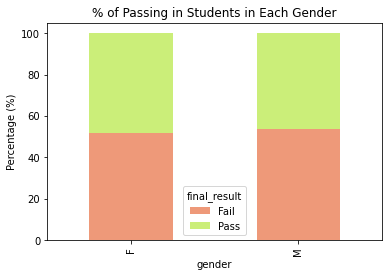

In [54]:
stacked_percent(g, 'in Each Gender')

### IMD band

In [55]:
# recall from our earlier analysis that imd_band had null values.
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [56]:
# This is where the null values are. 
studentInfo.loc[studentInfo['imd_band'].isnull()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass
17,AAA,2013J,71361,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
65,AAA,2013J,172112,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
30552,GGG,2013J,589914,M,North Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
31170,GGG,2014B,575199,F,North Western Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
31389,GGG,2014B,617889,F,South West Region,Lower Than A Level,NaN,0-35,0,30,N,Fail
31777,GGG,2014B,634470,F,South Region,A Level or Equivalent,NaN,0-35,0,30,N,Pass


In [57]:
# We can decide to drop the null values. Sometimes you could use mode or mean to fill the null values, but for our purposes we'll drop them.
studentInfo.dropna(subset=['imd_band'], inplace=True)

In [58]:
#  unique values 
studentInfo['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [59]:
# add '%' to 10-20 since it's missing :) 
studentInfo.loc[studentInfo['imd_band'] == '10-20', 'imd_band'] = '10-20%'

In [60]:
studentInfo['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20%', '0-10%'], dtype=object)

In [61]:
imd_band_count = studentInfo.groupby(['imd_band'])['id_student'].count().reset_index()
imd_band_count

,imd_band,id_student
0,0-10%,3311
1,10-20%,3516
2,20-30%,3654
3,30-40%,3539
4,40-50%,3256
5,50-60%,3124
6,60-70%,2905
7,70-80%,2879
8,80-90%,2762
9,90-100%,2536


Text(0.5, 0, 'IMD Band')

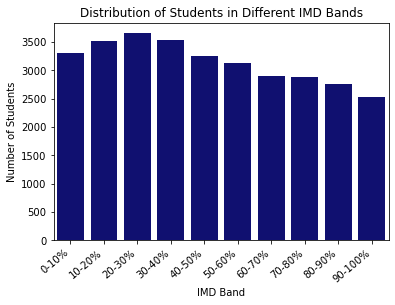

In [62]:
imb = sns.barplot(x="imd_band", y="id_student", data=imd_band_count, color='navy')
imb.set_xticklabels(imb.get_xticklabels(), rotation=40, ha="right")
imb.set_title('Distribution of Students in Different IMD Bands')
imb.set_ylabel('Number of Students')
imb.set_xlabel('IMD Band')

In [63]:
imdband_score = studentInfo.groupby(['imd_band'])['final_result'].value_counts()

In [64]:
imdband_score

imd_band  final_result
0-10%     Fail            2147
          Pass            1164
10-20%    Fail            2158
          Pass            1358
20-30%    Fail            2165
          Pass            1489
30-40%    Fail            1879
          Pass            1660
40-50%    Fail            1739
          Pass            1517
50-60%    Fail            1600
          Pass            1524
60-70%    Pass            1508
          Fail            1397
70-80%    Pass            1483
          Fail            1396
80-90%    Pass            1493
          Fail            1269
90-100%   Pass            1459
          Fail            1077
Name: final_result, dtype: int64

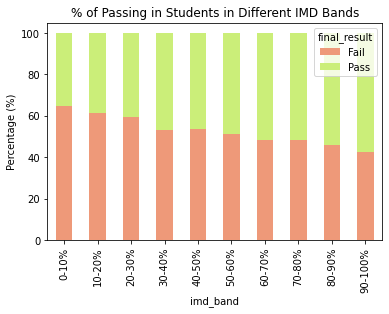

In [65]:
stacked_percent(imdband_score, 'in Different IMD Bands')

In [66]:
# identifying students who dropped
studentRegistration_dropped = studentRegistration.loc[~studentRegistration['date_unregistration'].isnull()]

In [67]:
studentRegistration_dropped.sort_values(by='date_unregistration')

,code_module,code_presentation,id_student,date_registration,date_unregistration
26576,FFF,2014B,535460,NaN,-365.0
5305,BBB,2014B,571732,-322.0,-317.0
26318,FFF,2014B,301128,-305.0,-297.0
16430,DDD,2014B,263022,-295.0,-274.0
13578,DDD,2013B,485943,-274.0,-271.0
...,...,...,...,...,...
404,AAA,2014J,95755,-80.0,241.0
3353,BBB,2013J,556427,-107.0,241.0
3047,BBB,2013J,498841,-29.0,241.0
311,AAA,2013J,2391984,-101.0,242.0


In [68]:
studentRegistration_dropped['date_unregistration'].describe()

count    10072.000000
mean        49.757645
std         82.460890
min       -365.000000
25%         -2.000000
50%         27.000000
75%        109.000000
max        444.000000
Name: date_unregistration, dtype: float64

[Text(0.5, 1.0, 'Distribution of Withdrawals')]

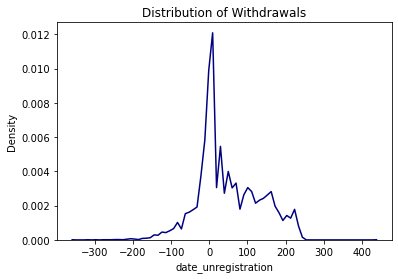

In [69]:
u = sns.histplot(x='date_unregistration', data=studentRegistration_dropped, color='navy', stat="density", element='poly', fill=False)
u.set(title='Distribution of Withdrawals')

In [70]:
# merge studentInfo table with registration data to analyze cohorts 
studentInfoReg = pd.merge(studentInfo[['code_module', 'code_presentation', 'id_student', 'gender', 'imd_band', 'age_band', 'disability']], studentRegistration_dropped, on=['code_module', 'code_presentation', 'id_student'])

studentInfoReg.head(10)

,code_module,code_presentation,id_student,gender,imd_band,age_band,disability,date_registration,date_unregistration
0,AAA,2013J,30268,F,30-40%,35-55,Y,-92.0,12.0
1,AAA,2013J,65002,F,70-80%,0-35,N,-180.0,96.0
2,AAA,2013J,94961,M,70-80%,35-55,N,-170.0,72.0
3,AAA,2013J,106247,M,80-90%,35-55,N,5.0,175.0
4,AAA,2013J,129955,M,50-60%,0-35,N,-197.0,135.0
5,AAA,2013J,135335,F,20-30%,0-35,N,-29.0,30.0
6,AAA,2013J,135400,F,90-100%,35-55,Y,-32.0,144.0
7,AAA,2013J,141377,M,90-100%,0-35,N,-110.0,129.0
8,AAA,2013J,147793,F,80-90%,0-35,N,-138.0,58.0
9,AAA,2013J,148993,F,30-40%,35-55,Y,-174.0,158.0


(-150.0, 150.0)

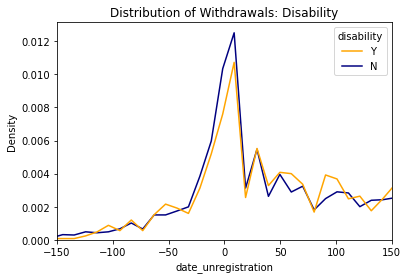

In [71]:
w_disability = sns.histplot(x='date_unregistration', data=studentInfoReg[['disability', 'date_unregistration']], hue='disability', palette={'Y': 'orange', 'N': 'navy'}, stat="density", common_norm=False, element='poly', fill=False)
w_disability.set(title='Distribution of Withdrawals: Disability')
w_disability.set_xlim(-150, 150)

In [72]:
studentInfoReg.groupby('disability')['date_unregistration'].describe()

,count,mean,std,min,25%,50%,75%,max
disability,,,,,,,,
N,8616.0,48.285283,82.108055,-365.0,-2.0,27.0,108.0,444.0
Y,1221.0,56.714988,82.841003,-225.0,0.0,41.0,118.0,237.0


(-100.0, 150.0)

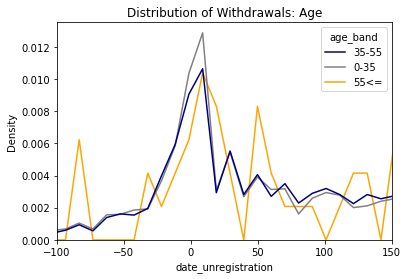

In [73]:
w_age = sns.histplot(x='date_unregistration', data=studentInfoReg[['age_band', 'date_unregistration']], hue='age_band', palette={'55<=': 'orange', '35-55': 'navy', '0-35': 'grey'}, stat="density", common_norm=False, element='poly', fill=False)
w_age.set(title='Distribution of Withdrawals: Age')
w_age.set_xlim(-100, 150)

In [74]:
studentInfoReg.groupby('age_band')['date_unregistration'].describe()

,count,mean,std,min,25%,50%,75%,max
age_band,,,,,,,,
0-35,7194.0,48.085488,81.918125,-365.0,-2.0,27.0,106.75,444.0
35-55,2596.0,52.622881,82.980467,-317.0,-2.0,33.0,115.00,240.0
55<=,47.0,58.276596,86.933433,-127.0,1.5,46.0,125.00,226.0


(-100.0, 150.0)

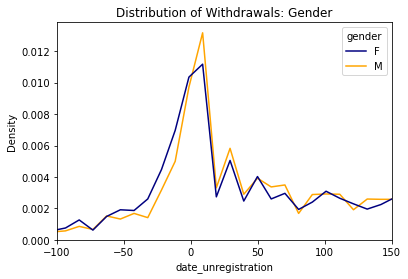

In [75]:
w_gender = sns.histplot(x='date_unregistration', data=studentInfoReg[['gender', 'date_unregistration']], hue='gender', palette={'M': 'orange', 'F': 'navy'}, stat="density", common_norm=False, element='poly', fill=False)
w_gender.set(title='Distribution of Withdrawals: Gender')
w_gender.set_xlim(-100, 150)

In [76]:
studentInfoReg.groupby('gender')['date_unregistration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,4387.0,45.973786,82.399539,-317.0,-7.0,24.0,104.0,241.0
M,5450.0,52.034495,82.022963,-365.0,0.0,31.5,110.0,444.0


In [77]:
# bin imd_bands so that it's easier to plot
imd_band_only = studentInfoReg[['id_student', 'imd_band', 'date_unregistration']]

imd_band_only['imd_band'] = imd_band_only ['imd_band'].apply(lambda x: x[:-1])

imd_band_bottom_half = sorted(imd_band_only['imd_band'].unique())[0:5]
imd_band_upper_half = sorted(imd_band_only['imd_band'].unique())[5:]

imd_band_only.loc[imd_band_only['imd_band'].str.contains('|'.join(imd_band_bottom_half)), 'imd_band_binned'] = '0-50'
imd_band_only.loc[imd_band_only['imd_band'].str.contains('|'.join(imd_band_upper_half)), 'imd_band_binned'] = '50-100'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

(-100.0, 150.0)

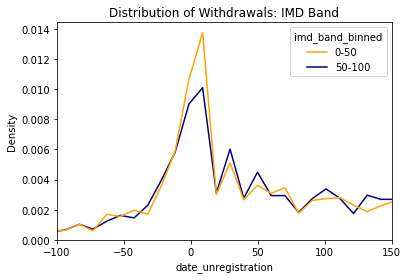

In [78]:
w_imdband = sns.histplot(x='date_unregistration', data=imd_band_only[['imd_band_binned', 'date_unregistration']], hue='imd_band_binned', palette={'0-50': 'orange', '50-100': 'navy'}, stat="density", common_norm=False, element='poly', fill=False)
w_imdband.set(title='Distribution of Withdrawals: IMD Band')
w_imdband.set_xlim(-100, 150)

In [79]:
imd_band_only.groupby('imd_band_binned')['date_unregistration'].describe()

,count,mean,std,min,25%,50%,75%,max
imd_band_binned,,,,,,,,
0-50,5883.0,46.771715,81.108510,-297.0,-1.0,25.0,102.5,444.0
50-100,3954.0,53.140364,83.766104,-365.0,-2.0,33.0,116.0,242.0


## III. Student Submissions and Registrations

In [80]:
# renaming the due date column so we don't confuse it with other date(s) when merged.
assessments.rename(columns={'date':'asm_due_date'}, inplace=True)

# merging studentAssessment data with assessments to look at due dates and the actual dates that the assessments were submitted 
studentAsmDue = pd.merge(studentAssessment[['id_student','id_assessment','date_submitted']], assessments[['code_module', 'code_presentation', 'id_assessment', 'asm_due_date']], on=['id_assessment'], how='left')

# now we want to merge our custom table from above with Registrations to see which assesment belongs to which registration
studentAsmDueREG = pd.merge(studentAsmDue, studentRegistration[['id_student', 'code_module', 'code_presentation']], how='right')

# if an assessment was submitted at a date greater than the due date (later than the due date), then we want to mark our new 'late?' column as 'N'. If it was submitted before or on the day of, we want to mark 'late?' as 'N'. 
studentAsmDueREG.loc[studentAsmDueREG['asm_due_date'] < studentAsmDueREG['date_submitted'], 'late?'] = 'Y'
studentAsmDueREG.loc[studentAsmDueREG['asm_due_date'] >= studentAsmDueREG['date_submitted'], 'late?'] = 'N'

# the data source tells us that there is a composite primary key (id_student, code_module, code_presentation) for the registration data. so to look at each student registration, we group by id_student, code_module and code_presentation. Then we can count the # of 'Y' and 'N' for that registraiton. 

studentAsmDueREGct = studentAsmDueREG.groupby(['id_student', 'code_module', 'code_presentation'])['late?'].value_counts().reset_index(name="count")

#### <font color=blue> Method 1: Write a function to query for specific registration

<font color=blue> If we want to do a quick query for each registration (student and course), I wrote a function to calculate the % late submission for each student registration given the student Id and code module.

In [81]:
def is_late(studentId, code_module, code_presentation):
    
    '''
    studentId: studentId
    code_module: the code name of the module
    code_presentation: the code name of the presentation
    '''
    
    studentTable = studentAsmDueREGct.loc[
        (studentAsmDueREGct['id_student'] == studentId) &
        (studentAsmDueREGct['code_module'] == code_module) &
        (studentAsmDueREGct['code_presentation'] == code_presentation)]
    
    if len(studentTable) == 0:
        return print("Cannot find student registration")
    
    elif len(studentTable) == 1: 
        v = studentTable['late?'].values[0]
        if v == 'N':
            return 0
        else:
            return 100
        
    elif len(studentTable) == 2: 
        ontime_ct = studentTable[studentTable['late?'] == 'N']['count'].values[0]
        late_ct = studentTable[studentTable['late?'] == 'Y']['count'].values[0]
        pct_late = late_ct / (ontime_ct + late_ct)
        
        return round(pct_late * 100, 2)

In [82]:
# if registration exists and there are late submissions
is_late(24734, 'AAA', '2014J')

80.0

In [83]:
# if registration exists and there are late submissions
is_late(28400, 'AAA', '2013J')

40.0

In [84]:
# if registration exists and there aren't any late submissions
is_late(2698577, 'BBB', '2014J')

0

In [85]:
# if registration does not exist
is_late(29411, 'AAA', '2013J')

Cannot find student registration


#### <font color=blue> Method 2: Calculate the percentage of late submissions for each student registration

<font color=blue> We can pivot the `studentAsmDueREGctPvt` table we made and calculate the % of late submissions per registration (id_student and code_module). 

In [86]:
studentAsmDueREGctPvt = pd.pivot_table(studentAsmDueREGct, values='count', index=['id_student', 'code_module', 'code_presentation'], columns=['late?'])

In [87]:
# replace all NaNs with zeros since we'll be calculating percentages 
studentAsmDueREGctPvt = studentAsmDueREGctPvt.fillna(0)

In [88]:
# calculate % of late submissions based on total number of submissions 
Y_ct = studentAsmDueREGctPvt['Y']
N_ct = studentAsmDueREGctPvt['N']

studentAsmDueREGctPvt['%_Late_Submission'] = round((Y_ct / (N_ct + Y_ct))*100, 2)

In [89]:
studentAsmDueREGctPvt.reset_index(inplace=True)

In [90]:
# We can see that it successfully calculated the % of late submissions for EACH registration!
studentAsmDueREGctPvt = studentAsmDueREGctPvt[['id_student', 'code_module', 'code_presentation', '%_Late_Submission']]
studentAsmDueREGctPvt.head(5)

late?,id_student,code_module,code_presentation,%_Late_Submission
0,6516,AAA,2014J,0.00
1,8462,DDD,2013J,33.33
2,8462,DDD,2014J,0.00
3,11391,AAA,2013J,0.00
4,23629,BBB,2013B,75.00


In [91]:
# checking to see it works
studentAsmDueREGctPvt.loc[studentAsmDueREGctPvt['id_student'] == 8462]

late?,id_student,code_module,code_presentation,%_Late_Submission
1,8462,DDD,2013J,33.33
2,8462,DDD,2014J,0.00


In [92]:
# cross checking with our function
print(is_late(8462, 'DDD', '2013J'))
print(is_late(8462, 'DDD', '2014J'))

33.33
0


## IV. VLE activity types and the total sum clicks per activity type for each student registration.

In [93]:
studentVLE_REG = pd.merge(studentVLE, studentRegistration, on=['id_student', 'code_module', 'code_presentation'], how='right')

studentVLE_REG = pd.merge(studentVLE_REG, vle, on=['id_site', 'code_module', 'code_presentation'])

In [94]:
# groupby
studentVLE_REG_groupby = studentVLE_REG.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])['sum_click'].agg(np.sum).reset_index()

studentVLE_REG_groupby.head(10)

,id_student,code_module,code_presentation,activity_type,sum_click
0,6516,AAA,2014J,forumng,37.0
1,6516,AAA,2014J,homepage,44.0
2,6516,AAA,2014J,oucontent,293.0
3,6516,AAA,2014J,resource,6.0
4,6516,AAA,2014J,subpage,10.0
5,6516,AAA,2014J,url,14.0
6,8462,DDD,2013J,forumng,6.0
7,8462,DDD,2013J,homepage,23.0
8,8462,DDD,2013J,oucontent,2.0
9,8462,DDD,2013J,ouwiki,11.0


Text(0.5, 1.0, 'Distribution of Activity Types')

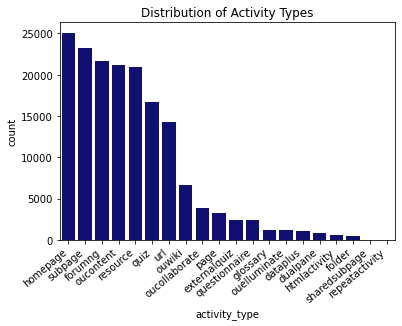

In [95]:
studentVLE_REG_groupby
ordering = studentVLE_REG_groupby['activity_type'].value_counts().index

at = sns.countplot(x='activity_type', data=studentVLE_REG_groupby, color='navy', order=ordering)
at.set_xticklabels(at.get_xticklabels(), rotation=40, ha="right")
at.set_title('Distribution of Activity Types')

In [96]:
#pivot table to analyze total sum per activity type for each student registration
studentVLE_REG_pivot = pd.pivot_table(studentVLE_REG, values='sum_click', index=['id_student', 'code_module', 'code_presentation'], columns=['activity_type'], aggfunc=np.sum)

studentVLE_REG_pivot.head(10)

,,activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
id_student,code_module,code_presentation,,,,,,,,,,,,,,,,,,,,
6516,AAA,2014J,NaN,NaN,NaN,NaN,37.0,NaN,44.0,NaN,NaN,293.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,10.0,14.0
8462,DDD,2013J,NaN,NaN,NaN,NaN,6.0,NaN,23.0,NaN,NaN,2.0,NaN,11.0,NaN,NaN,NaN,NaN,8.0,NaN,33.0,1.0
11391,AAA,2013J,NaN,NaN,NaN,NaN,18.0,NaN,9.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0
23629,BBB,2013B,NaN,NaN,NaN,NaN,22.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
23698,CCC,2014J,NaN,NaN,NaN,NaN,6.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,NaN,6.0,NaN,9.0,1.0
23798,BBB,2013J,NaN,NaN,NaN,NaN,8.0,NaN,15.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,2.0,NaN,4.0,8.0
24186,GGG,2014B,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24213,DDD,2014B,NaN,NaN,NaN,NaN,77.0,NaN,23.0,NaN,7.0,68.0,NaN,23.0,NaN,NaN,NaN,NaN,10.0,NaN,45.0,3.0
24391,GGG,2013J,NaN,NaN,NaN,NaN,7.0,NaN,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,1.0,NaN


In [97]:
# We see a lot of null values above. Let's do a count of non-null values per activity_type 
studentVLE_REG_pivot.count().sort_values(ascending=False).reset_index(name='non-null_count')


,activity_type,non-null_count
0,homepage,25090
1,subpage,23266
2,forumng,21641
3,oucontent,21178
4,resource,20935
5,quiz,16752
6,url,14279
7,ouwiki,6634
8,oucollaborate,3850
9,page,3241


<font color=blue> Because we have a lot more data for the top 5 activity types that are between 20000-25000, we could use them as features. 

In [98]:
studentVLE_REG_pivot.reset_index(inplace=True)

feature_cols = ['id_student', 'code_module', 'code_presentation', 'homepage', 'subpage', 'forumng', 'oucontent', 'resource']
studentVLE_REG_pivot = studentVLE_REG_pivot[feature_cols]

<font color=blue> We can try to fill the null values with zeros. This is because when there's a null that means that particular module did not offer the activity, so we can say zero clicks indicating that it was never used. 


In [99]:

for col in studentVLE_REG_pivot.columns[3:]:
    studentVLE_REG_pivot[col].fillna(0, inplace=True)

studentVLE_REG_pivot

activity_type,id_student,code_module,code_presentation,homepage,subpage,forumng,oucontent,resource
0,6516,AAA,2014J,44.0,10.0,37.0,293.0,6.0
1,8462,DDD,2013J,23.0,33.0,6.0,2.0,8.0
2,11391,AAA,2013J,9.0,0.0,18.0,33.0,2.0
3,23629,BBB,2013B,1.0,0.0,22.0,0.0,0.0
4,23698,CCC,2014J,10.0,9.0,6.0,0.0,6.0
...,...,...,...,...,...,...,...,...
28112,2698257,AAA,2013J,13.0,1.0,21.0,39.0,0.0
28113,2698535,CCC,2014B,15.0,3.0,62.0,0.0,0.0
28114,2698535,EEE,2013J,47.0,0.0,186.0,142.0,0.0
28115,2698577,BBB,2014J,4.0,3.0,15.0,18.0,4.0


In [100]:
studentVLE_REG_pivot.rename(columns={'homepage': 'homepage_totalclicks', 'subpage':'subpage_totalclicks', 'forumng':'forumng_totalclicks', 'oucontent':'outcontent_totalclicks', 'resource':'resource_totalclicks'}, inplace=True)

## V. Predictive Analytics

In [104]:
# We can merge the studentAssessment table, assessments table and student Info table to get an understanding of how students performed for which assessments and what their backgrounds are. 
studentAsmInfo = pd.merge(studentInfo, studentAssessmentAvgScore).merge(studentVLE_REG_pivot).merge(studentAsmDueREGctPvt)

In [105]:
studentAsmInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24591 entries, 0 to 24590
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code_module             24591 non-null  object 
 1   code_presentation       24591 non-null  object 
 2   id_student              24591 non-null  int64  
 3   gender                  24591 non-null  object 
 4   region                  24591 non-null  object 
 5   highest_education       24591 non-null  object 
 6   imd_band                24591 non-null  object 
 7   age_band                24591 non-null  object 
 8   num_of_prev_attempts    24591 non-null  int64  
 9   studied_credits         24591 non-null  int64  
 10  disability              24591 non-null  object 
 11  final_result            24591 non-null  object 
 12  average_score           24570 non-null  float64
 13  homepage_totalclicks    24591 non-null  float64
 14  subpage_totalclicks     24591 non-null

In [106]:
# fill nulls
studentAsmInfo['average_score'].fillna(studentAsmInfo['average_score'].mean(), inplace=True)

In [107]:
# Transform string variables to numerical variables

# Final_result
PF = {'Pass': 1, 'Fail': 0}
studentAsmInfo['final_result'].replace(PF, inplace=True)

# Gender
Gender = {'M': 0, 'F': 1}
studentAsmInfo['gender'].replace(Gender, inplace=True)

# Disability
Disability = {'N': 0, 'Y': 1}
studentAsmInfo['disability'].replace(Disability, inplace=True)

# IMD Band
imd_band_score = {'0-10%':0, '10-20%':1, '20-30%':2, '30-40%':3, '40-50%':4, '50-60%':5, '60-70%':6, '70-80%':7, '80-90%':8, '90-100%':9}
studentAsmInfo['imd_band'].replace(imd_band_score, inplace=True)

# Age
age_encoding = {'55<=':2, '35-55':1, '0-35':0}
studentAsmInfo['age_band'].replace(age_encoding, inplace=True)


In [108]:
float_values_clicks = [col for col in studentAsmInfo.columns if 'totalclicks' in col]
studentAsmInfo[float_values_clicks].describe()

,homepage_totalclicks,subpage_totalclicks,forumng_totalclicks,outcontent_totalclicks,resource_totalclicks
count,24591.000000,24591.000000,24591.000000,24591.000000,24591.000000
mean,26.546826,12.789394,30.344476,42.751535,4.075637
std,35.787581,17.375554,64.107419,75.793524,5.900267
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,1.000000,1.000000
50%,16.000000,6.000000,11.000000,12.000000,2.000000
75%,34.000000,17.000000,33.000000,51.000000,5.000000
max,883.000000,280.000000,1446.000000,2201.000000,304.000000


In [109]:
# use minmax scaler to preserve the distribution but it doesnt reduce the effect of data points that are outlires 
studentAsmInfo[float_values_clicks] = StandardScaler().fit_transform(studentAsmInfo[float_values_clicks])

In [110]:
studentAsmInfo[float_values_clicks].describe()

,homepage_totalclicks,subpage_totalclicks,forumng_totalclicks,outcontent_totalclicks,resource_totalclicks
count,2.459100e+04,2.459100e+04,2.459100e+04,2.459100e+04,2.459100e+04
mean,4.124995e-16,1.600647e-14,9.173719e-16,-5.798174e-15,3.634689e-15
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-7.418039e-01,-7.360717e-01,-4.733476e-01,-5.640641e-01,-6.907688e-01
25%,-5.741445e-01,-6.209652e-01,-4.421493e-01,-5.508701e-01,-5.212815e-01
50%,-2.947123e-01,-3.907520e-01,-3.017571e-01,-4.057360e-01,-3.517942e-01
75%,2.082657e-01,2.423342e-01,4.142389e-02,1.088303e-01,1.566677e-01
max,2.393206e+01,1.537885e+01,2.208300e+01,2.847595e+01,5.083337e+01


In [111]:
studentAsmInfo['average_score'].describe()

count    24591.000000
mean        72.709362
std         16.276227
min          0.000000
25%         64.666667
50%         76.000000
75%         84.416667
max        100.000000
Name: average_score, dtype: float64

In [112]:
studentAsmInfo[['average_score']] = MinMaxScaler().fit_transform(studentAsmInfo[['average_score']])

In [113]:
studentAsmInfo['%_Late_Submission'].describe()

count    24591.000000
mean        30.788858
std         32.910936
min          0.000000
25%          0.000000
50%         20.000000
75%         50.000000
max        100.000000
Name: %_Late_Submission, dtype: float64

In [114]:
studentAsmInfo[['%_Late_Submission']] = MinMaxScaler().fit_transform(studentAsmInfo[['%_Late_Submission']])

<AxesSubplot:>

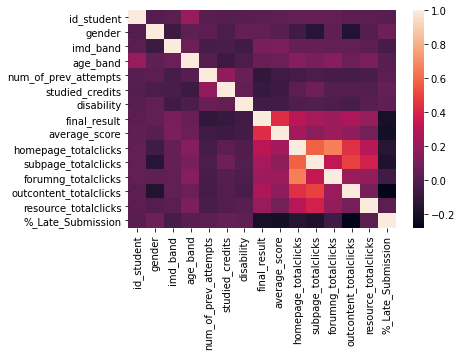

In [115]:
studentAsmInfo_corr = studentAsmInfo.corr()

sns.heatmap(studentAsmInfo_corr)

In [116]:
print(studentAsmInfo_corr['final_result'].sort_values(ascending=False))

final_result              1.000000
average_score             0.430161
homepage_totalclicks      0.303840
outcontent_totalclicks    0.265212
subpage_totalclicks       0.247612
forumng_totalclicks       0.217778
resource_totalclicks      0.199027
imd_band                  0.110852
age_band                  0.062868
gender                    0.042037
id_student                0.022909
disability               -0.061457
studied_credits          -0.100337
num_of_prev_attempts     -0.112943
%_Late_Submission        -0.201470
Name: final_result, dtype: float64


<font color=blue> We want to choose features that are highly correlated with the `final_result`. Setting our threshold at 0.10 for the correlations, we see that `average_score`, different types of `totalclicks` and `imd_band` are the most correlated with `final_result`. <br>
    
However, we want the features to be not highly correlated with each other to avoid _multicolinearity_ especially because we want to use logistic regression, which assumes that there is no multicolinearity in the features. <br><br>

We'll be using `average_score` as a feature for sure as it is a "top" feature.

In [117]:
print(studentAsmInfo_corr['average_score'].sort_values(ascending=False))

average_score             1.000000
final_result              0.430161
homepage_totalclicks      0.239137
forumng_totalclicks       0.216035
outcontent_totalclicks    0.182061
subpage_totalclicks       0.163078
imd_band                  0.113670
resource_totalclicks      0.095141
age_band                  0.068458
id_student                0.027744
gender                    0.014208
disability               -0.052888
num_of_prev_attempts     -0.069889
studied_credits          -0.074247
%_Late_Submission        -0.213839
Name: average_score, dtype: float64


<font color=blue> So looking at its correlations with other features, we can choose features with lower correlations. Let's choose `subpage_totalclicks`, and `imd_band`.  

In [118]:
print(studentAsmInfo_corr['subpage_totalclicks'].sort_values(ascending=False))

subpage_totalclicks       1.000000
homepage_totalclicks      0.575713
outcontent_totalclicks    0.491917
resource_totalclicks      0.384919
forumng_totalclicks       0.329700
final_result              0.247612
average_score             0.163078
age_band                  0.110197
studied_credits           0.073834
imd_band                  0.054598
id_student                0.044220
disability               -0.011696
num_of_prev_attempts     -0.025064
gender                   -0.144436
%_Late_Submission        -0.174348
Name: subpage_totalclicks, dtype: float64


In [119]:
print(studentAsmInfo_corr['imd_band'].sort_values(ascending=False))

imd_band                  1.000000
average_score             0.113670
final_result              0.110852
age_band                  0.071571
subpage_totalclicks       0.054598
homepage_totalclicks      0.053386
forumng_totalclicks       0.042932
outcontent_totalclicks    0.038418
resource_totalclicks      0.026440
id_student                0.025761
studied_credits          -0.034787
num_of_prev_attempts     -0.044244
%_Late_Submission        -0.045779
disability               -0.062964
gender                   -0.081464
Name: imd_band, dtype: float64


In [120]:
# Features and target
features = ['average_score', 'subpage_totalclicks', 'imd_band']
X = studentAsmInfo[features] 
y = studentAsmInfo.final_result 

<AxesSubplot:xlabel='final_result', ylabel='count'>

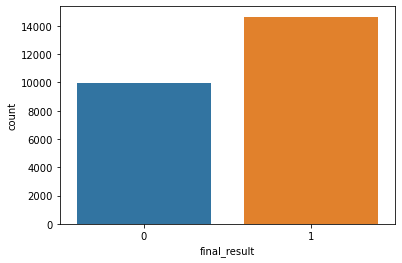

In [121]:
# we end up having a lot more passes than fails. 
sns.countplot(x=y)

In [122]:
y_count = studentAsmInfo['final_result'].value_counts()

print('0: ', (y_count[0]))
print('1: ', (y_count[1]))

0:  9945
1:  14646


In [123]:
oversampling = SMOTE(random_state=1)
X, y = oversampling.fit_resample(X, y)

In [124]:
y_resampled = y.value_counts()

print('0: ', (y_resampled[0]))
print('1: ', (y_resampled[1]))

0:  14646
1:  14646


<AxesSubplot:xlabel='final_result', ylabel='count'>

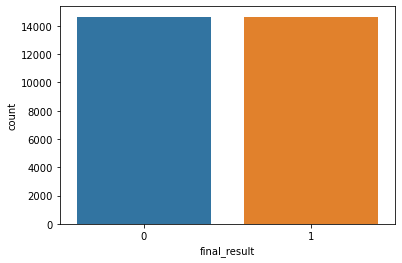

In [125]:
sns.countplot(x=y)

In [126]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
# For our model evaluation strategy, we'll print the confusion matrix, sensitivity, specificity, accuracy, precision and recall. We will also cross-validate (K-Folds).

# confusion matrix with other metrics
def evaluation(yTest, yPred):
    
    confusion_matrix = metrics.confusion_matrix(yTest, yPred)

    TN = confusion_matrix[0,0]
    TP = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    FP = confusion_matrix[0,1]
    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)

    print("----------Confusion Matrix----------")
    print(pd.DataFrame(confusion_matrix))

    print("----------Sensitivity/Specificity----------")
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)

    print("----------Classification Report----------")
    print(metrics.classification_report(yTest, yPred))
    print("Accuracy:", metrics.accuracy_score(yTest, yPred))
    print("Precision:", metrics.precision_score(yTest, yPred))
    print("Recall:",metrics.recall_score(yTest, yPred))

# cross validation
def crossVal(model, xTrain, yTrain):
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    cv_scores = cross_val_score(model, xTrain, yTrain, cv=cv, scoring='accuracy')

    print("----------Cross Validation----------")
    print(cv_scores)
    print("Average score from CV: ", round(np.mean(cv_scores), 2))
    

In [128]:
# Creating model - Logistic Regression

# model fitting
logClassifier = LogisticRegression(random_state=0) 
logClassifier.fit(X_train, y_train)

# prediction
y_pred_lc = logClassifier.predict(X_test)

# evaluation
evaluation(y_test, y_pred_lc)
crossVal(logClassifier, X_train, y_train)

----------Confusion Matrix----------
      0     1
0  1979   954
1   827  2099
----------Sensitivity/Specificity----------
Sensitivity:  0.7173615857826384
Specificity:  0.6747357654278895
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2933
           1       0.69      0.72      0.70      2926

    accuracy                           0.70      5859
   macro avg       0.70      0.70      0.70      5859
weighted avg       0.70      0.70      0.70      5859

Accuracy: 0.6960232121522444
Precision: 0.6875204716672125
Recall: 0.7173615857826384
----------Cross Validation----------
[0.70300832 0.71751654 0.70108812 0.69554086 0.70236825]
Average score from CV:  0.7


In [129]:
# Creating model - Decision Tree Classifier

# model fitting
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(X_train, y_train)

# prediction
y_pred_dt = dtClassifier.predict(X_test)

# eval and crossval
evaluation(y_test, y_pred_dt)
crossVal(dtClassifier, X_train, y_train)

----------Confusion Matrix----------
      0     1
0  2071   862
1  1026  1900
----------Sensitivity/Specificity----------
Sensitivity:  0.6493506493506493
Specificity:  0.7061029662461643
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2933
           1       0.69      0.65      0.67      2926

    accuracy                           0.68      5859
   macro avg       0.68      0.68      0.68      5859
weighted avg       0.68      0.68      0.68      5859

Accuracy: 0.6777607100187746
Precision: 0.6879073135409124
Recall: 0.6493506493506493
----------Cross Validation----------
[0.67420525 0.68337956 0.67015148 0.67932579 0.67377854]
Average score from CV:  0.68


## Results


<font color=blue>
The goal of the project was to identify students who are at risk of failure. By using the top 3 correlated variables: `average_score`, `subpage_totalclicks` and `imd_band`, we are trying to predict whether a student passed or failed the course. <br>
    
Because this has a binary outcome (`pass` or `fail`, also known as `1` or `0`), we want to use binary classification. 
I used logistic regression classification and decision tree classification using the `scikit-learn` library.

For <b>logistic regression</b>, we find that the accuracy comes out to be 0.70, cross validated as 0.70. For <b> decision tree classifier</b>, accuracy comes out to be 0.68, cross validated at 0.68. 

Considering all scores, logisitc regression gives us a better prediction for our use case. This is because the the sensitivity, otherwise known as the ability to predict true positives, is higher at 0.72, compared to the decision tree classifier's sensitivity which is 0.65. The reason why we care about the sensitivty measure is because higher sensitivity means there is a higher percentage of true positives. The model is relatively going to do a good job of detecting true positives. This is important for us because we don't want the model falsely identify that a student will pass, when they're actually going to fail, and miss out on the opportunity to help them. 

Both models leave room for improvement in terms of achieving higher scores in all areas. During feature selection, we did not see many highly correlated features that could be used. This could be one area of improvement when we add more datasets and engineer more futures. More on this in section v below. 

In [130]:
logClassifier.coef_

array([[6.25881433, 0.6861454 , 0.05644072]])

In [131]:
dtClassifier.feature_importances_

array([0.61043885, 0.23242475, 0.1571364 ])

<font color=blue> With both logistic regression coefficients and decision tree's gini importance, we see that average score on the exams (`average_score`) is the best indicator of student success based on the features we've used to fit the models. 